<a href="https://colab.research.google.com/github/Rake11/Major/blob/main/Copy_of_Rakesh_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import cv2
from google.colab.patches import cv2_imshow

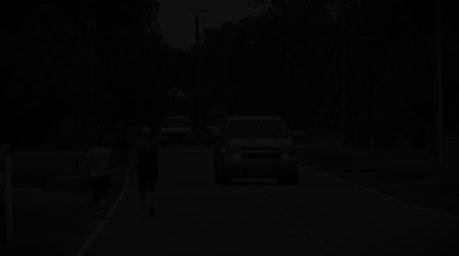

illuminated image


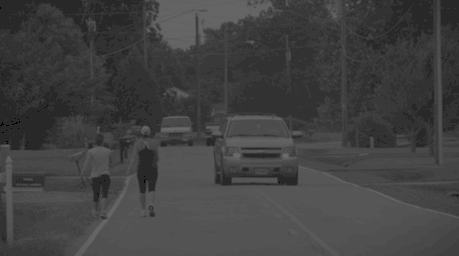

vehicle detected


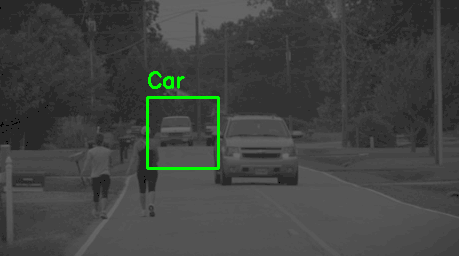

vehicle detected


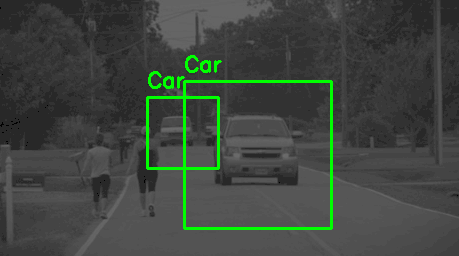

In [4]:
#image illumination

import numpy as np

def a_g(image, g=1.0):

   iG = 1.0 / g

   t = np.array([((i / 255.0) ** iG) * 255

      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, t)

 #location of the image

org=cv2.imread('/content/Input4.png',1)

cv2_imshow(org)

# g = 0.6
# org = a_g(org,g=g)
# cv2.imwrite('target.png',org)

g = 3                       # change the value here to get different result

detected_image = a_g(org, g=g)
#cv2.imwrite('target.png',org)

print("illuminated image")

cv2_imshow(detected_image)

#object detection


vehicle_classifier = '/content/cars.xml'

vehicle_tracker = cv2.CascadeClassifier(vehicle_classifier)

vehicle = vehicle_tracker.detectMultiScale(detected_image)

#location of the vehicle in image

# print(vehicle)
if(len(vehicle) != 0):
  for (x,y,w,h) in vehicle:
      cv2.rectangle(detected_image, (x,y), (x+w, y+h), (0,255,0), 2)
      cv2.putText(detected_image, 'Car', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
      print("vehicle detected")
      cv2_imshow(detected_image)
else:
  print("vehicle not detected")
